## Нейронка для проверки мощенических операций

In [1]:
import numpy as np
import pandas as pd
from typing import Optional, List
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

import sklearn.base

seed = 24

In [2]:
!pip install numpy pandas scikit-learn matplotlib


In [ ]:
Я выбрал датасет с kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [3]:
data = pd.read_csv('/Users/sosiska_killer/Documents/ML/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Из описания датасета с сайта становиться ясно что датасет очень не сбалансированн по классам. Что бы кореектно раздделить данные я использовал Стратифицированное разделение. 

In [8]:
from sklearn.model_selection import train_test_split

# Определим признаки и целевую переменную
X = data.drop(columns = ['Class'])
y = data['Class']

# Разделение на обучающую и тестовую выборки с учетом стратификации
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.2, 
    random_state = 42, 
    stratify = y  # Стратифицированное разделение
)

print(f"Training set: {X_train.shape}, {y_train.value_counts()}")
print(f"Test set: {X_test.shape}, {y_test.value_counts()}")


Training set: (227845, 30), Class
0    227451
1       394
Name: count, dtype: int64
Test set: (56962, 30), Class
0    56864
1       98
Name: count, dtype: int64


Я решил выбрать для обучения случайный лес. Потому что он справляется с несбалансированными данными и дает высокую инетрпритируемость после обучения.

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

AUPRC: 0.8600195248697491


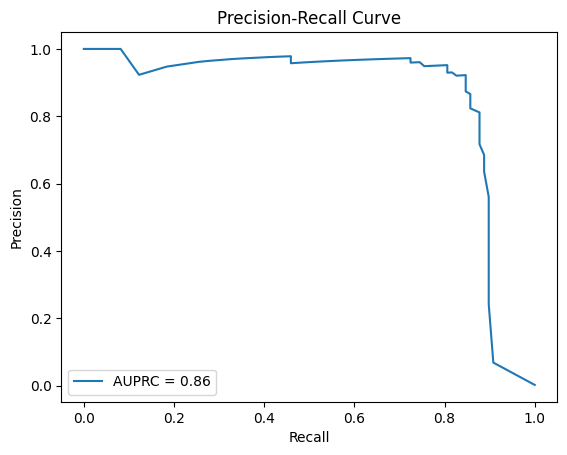

In [10]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Предсказание вероятностей для тестовой выборки
y_scores = model.predict_proba(X_test)[:, 1]  # Вероятность класса 1 (мошенничество)

# Вычисление Precision-Recall кривой
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Вычисление AUPRC
auprc = auc(recall, precision)

print(f"AUPRC: {auprc}")

# Визуализация Precision-Recall кривой
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
